# 카이 스퀘어 검정
- 지금까지 공부한 검정방법들은 2개의 범주만 존재.
- 범주의 수가 두 개보다 많으면 일반적으로 카이 스퀘어 검정을 사용
-자료가 빈도로 주어졌을 때, 특히 명목척도 자료의 분석에 이용됨.
- 관측된 도수와 기대도수 간의 차이를 보여주는 것
- 범주형 확률변수 X가 다른 범주형 확률변수 Y와 독립인지 상관관계를 가지는가를 검증하는데 사용

상자안에 카드가 각각 몇 장씩 들어 있는지가 문제가 된다면? -> 카이제곱 검정

평균만이 문제 된다면? -> z-검정 또는 t-검정

카이제곱 검정 
- 카이제곱검정은 범주형 확률분포의 모수  μ=(μ1,…,μK) 에 대한 가설을 조사하는 검정 방법으로 적합도검정(goodness of fit test)이라고도 부른다.
- scipy.stats.chisquare(f_obs, f_exp=None)

  - f_obs : 데이터 행렬
  - f_exp : 기댓값 행렬

카이제곱 독립 검정
- 카이제곱검정은 어떤 범주형 확률변수  X 가 다른 범주형 확률변수  Y 와 독립인지 상관관계를 가지는가를 검증하는데도 사용할 수 있다. 카이제곱검정을 독립을 확인하는데 사용하면 카이제곱 독립검정이라고 부른다.

[출처] : https://datascienceschool.net/view-notebook/14bde0cc05514b2cae2088805ef9ed52/

# 카이제곱 독립검정 예제

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/Kaggle_data/vgsales/vgsales.csv')
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


가정 1. 
- 귀무가설:년도마다 게임 장르의 차이가 없을 것이다.
- 대립가설: 년도마다 게임 장르의 차이가 있을 것이다.

In [3]:
# 그래프를 그리기위해 float 타입 변수를 object 타입으로 변환

Year_count=data['Year'].value_counts().reset_index(name='count')
Year_count['index']=Year_count['index'].astype('object')
Year_count.dtypes

index    object
count     int64
dtype: object

<BarContainer object of 39 artists>

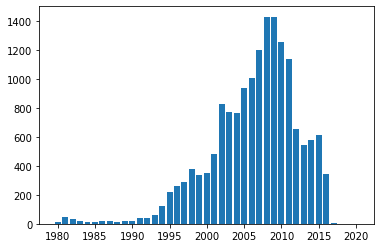

In [4]:
plt.bar(Year_count['index'],Year_count['count'])

년도 별로 차이가 있으므로 게임 개수가 비슷한 년도만 뽑아서 비교해보자.

In [5]:
Year_count.head(5)
# 2009, 2008,2010,2007,2011

,index,count
0,2009,1431
1,2008,1428
2,2010,1259
3,2007,1202
4,2011,1139


In [6]:
final_df=data[(data['Year']== 2009)|
              (data['Year']==2008)|
              (data['Year']==2010)|
              (data['Year']==2007)|
              (data['Year']==2011)][['Year','Genre']]
final_df['Year']=final_df['Year'].astype('object')
final_df=final_df.groupby('Year')['Genre'].value_counts().reset_index(name='count')
final_df.head()

,Year,Genre,count
0,2007.0,Action,211
1,2007.0,Sports,167
2,2007.0,Misc,151
3,2007.0,Role-Playing,103
4,2007.0,Simulation,90


In [7]:
data[data['Year']==2011]['Genre'].unique()

array(['Shooter', 'Racing', 'Platform', 'Misc', 'Role-Playing', 'Action',
       'Sports', 'Simulation', 'Adventure', 'Fighting', 'Puzzle',
       'Strategy'], dtype=object)

카이스퀘어 검정을 위한 Table을 만들어 보자.

In [8]:
#빈 데이터 프레임 생성
chi_df = pd.DataFrame(columns=['2007','2008','2009','2010','2011'],index=['Shooter', 'Racing', 'Platform', 'Misc', 'Role-Playing', 'Action',
        'Sports', 'Simulation', 'Adventure', 'Fighting', 'Puzzle',
        'Strategy'])
chi_df

,2007,2008,2009,2010,2011
Shooter,NaN,NaN,NaN,NaN,NaN
Racing,NaN,NaN,NaN,NaN,NaN
Platform,NaN,NaN,NaN,NaN,NaN
Misc,NaN,NaN,NaN,NaN,NaN
Role-Playing,NaN,NaN,NaN,NaN,NaN
Action,NaN,NaN,NaN,NaN,NaN
Sports,NaN,NaN,NaN,NaN,NaN
Simulation,NaN,NaN,NaN,NaN,NaN
Adventure,NaN,NaN,NaN,NaN,NaN
Fighting,NaN,NaN,NaN,NaN,NaN


In [9]:
for i in range(2007,2012):
  for idx in chi_df.index:
    chi_df.loc[idx,str(i)]=int(final_df[(final_df['Year']==i)&
                               (final_df['Genre']==idx)]['count'].values)

chi_df

,2007,2008,2009,2010,2011
Shooter,85,83,91,81,94
Racing,86,82,84,57,65
Platform,42,62,29,31,37
Misc,151,212,207,201,184
Role-Playing,103,112,103,103,95
Action,211,221,272,226,239
Sports,167,200,184,186,122
Simulation,90,119,123,82,56
Adventure,84,166,141,154,108
Fighting,50,57,53,40,50


In [12]:
chi2_contingency(chi_df)

(112.90091741238554,
 5.7010243238970573e-08,
 44,
 array([[ 80.76606286,  95.95169531,  96.1532745 ,  84.5960675 ,
          76.53289983],
        [ 69.60024772,  82.68648398,  82.86019508,  72.90075863,
          65.9523146 ],
        [ 37.40548072,  44.43845797,  44.53181607,  39.17928472,
          35.44496052],
        [177.72255767, 211.13794705, 211.58151417, 186.15033287,
         168.40764824],
        [ 96.02601022, 114.08081746, 114.32048305, 100.57965629,
          90.99303298],
        [217.54729834, 258.45053414, 258.99349745, 227.86360118,
         206.1450689 ],
        [159.85725344, 189.91360892, 190.31258709, 167.43783867,
         151.47871187],
        [ 87.46555194, 103.91082211, 104.12912216,  91.61325283,
          82.88125097],
        [121.52128813, 144.36971667, 144.6730144 , 127.28394488,
         115.15203592],
        [ 46.52422976,  55.27171389,  55.38783093,  48.73045363,
          44.08577179],
        [ 55.27078495,  65.6627961 ,  65.80074315,  57.8917

카이제곱 독립검정의 유의확률은 0.05보다 작으므로 귀무가설을 기각하지 않아도 될 것 같다.

즉, 년도마다 게임의 유행은 크게 달라지지 않은 것으로 보인다. 많이 출시되는 장르는 많이 출시되고, 적게 출시되는 게임은 계속 적게 출시되는 경향이 있는 것으로 보인다.